In [105]:
import pandas as pd

In [106]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [107]:
import torch

In [108]:
SPY = pd.read_csv('SPY.csv')
SPY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-08-15,196.470001,196.649994,194.309998,195.720001,163.820328,139951000
1,2014-08-18,196.800003,197.449997,196.690002,197.360001,165.192993,75424000
2,2014-08-19,197.839996,198.539993,197.440002,198.389999,166.055115,59135000
3,2014-08-20,198.119995,199.160004,198.080002,198.919998,166.498749,72763000
4,2014-08-21,199.089996,199.759995,198.929993,199.500000,166.984268,67791000
...,...,...,...,...,...,...,...
2511,2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600
2512,2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600
2513,2024-08-12,534.210022,535.729980,530.950012,533.270020,533.270020,42542100
2514,2024-08-13,536.530029,542.280029,536.280029,542.039978,542.039978,52333100


In [109]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

# Convert to tensors
features = SPY[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
targets = SPY['Close'].values

features_tensor = torch.tensor(features, dtype=torch.float32)
targets_tensor = torch.tensor(targets, dtype=torch.float32)

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, features_tensor, targets_tensor):
        self.features = features_tensor
        self.targets = targets_tensor

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create dataset and dataloader
dataset = CustomDataset(features_tensor, targets_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Example usage
for batch_features, batch_targets in dataloader:
    # Your training code here
    print(batch_features, batch_targets)


tensor([[1.9895e+02, 2.0155e+02, 1.9859e+02, 2.0121e+02, 1.7262e+02, 1.5306e+08],
        [2.1468e+02, 2.1498e+02, 2.1398e+02, 2.1417e+02, 1.8770e+02, 6.6542e+07],
        [4.4296e+02, 4.4463e+02, 4.3892e+02, 4.3918e+02, 4.2019e+02, 8.9352e+07],
        [2.3670e+02, 2.3724e+02, 2.3574e+02, 2.3686e+02, 2.0880e+02, 9.0684e+07],
        [2.8011e+02, 2.8122e+02, 2.7922e+02, 2.8050e+02, 2.5538e+02, 6.5585e+07],
        [2.2122e+02, 2.2174e+02, 2.2066e+02, 2.2170e+02, 1.9429e+02, 5.9877e+07],
        [2.0388e+02, 2.0619e+02, 2.0371e+02, 2.0419e+02, 1.7171e+02, 1.5901e+08],
        [1.9769e+02, 1.9830e+02, 1.9661e+02, 1.9702e+02, 1.6568e+02, 1.3130e+08],
        [5.1203e+02, 5.1420e+02, 5.1200e+02, 5.1230e+02, 5.0907e+02, 4.9799e+07],
        [2.0928e+02, 2.1067e+02, 2.0928e+02, 2.1057e+02, 1.7972e+02, 8.0271e+07],
        [1.9633e+02, 1.9660e+02, 1.9258e+02, 1.9274e+02, 1.6208e+02, 2.1070e+08],
        [2.8915e+02, 2.8949e+02, 2.8700e+02, 2.8816e+02, 2.6117e+02, 6.5910e+07],
        [3.9384e

In [110]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

# Instantiate the model and load weights (if you have a trained model)
model = SimpleModel()
torch.save(model.state_dict(), 'model.pth')
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set model to evaluation mode

/var/folders/hj/pwp8mnp90wb03qbkc2c60_500000gn/T/ipykernel_8587/1696535305.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth')

SimpleModel(
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

In [111]:
# Example input data
input_data = np.linspace(-10, 10, 100).reshape(-1, 1)  # 100 data points between -10 and 10

# Convert to PyTorch tensor
input_tensor = torch.tensor(input_data, dtype=torch.float32)

# Make predictions
with torch.no_grad():  # Disable gradient calculation
    predictions = model(input_tensor).numpy()  # Convert predictions to NumPy array


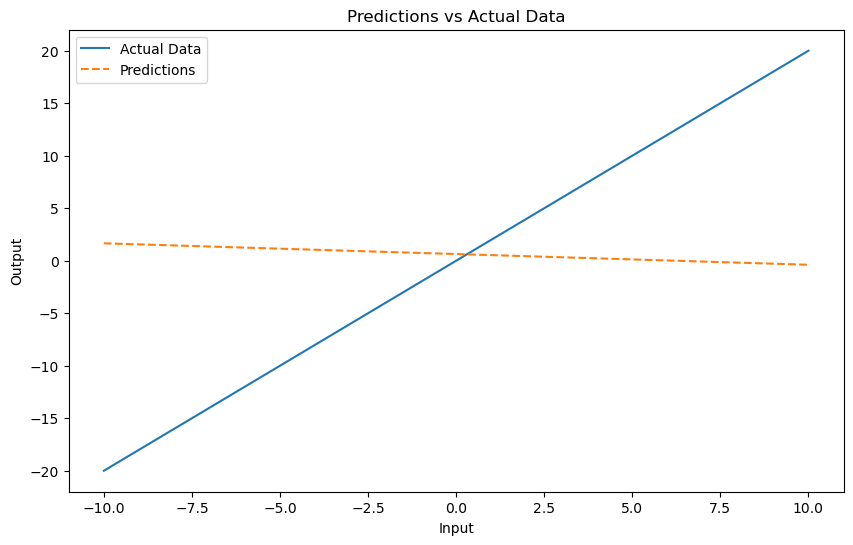

In [112]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(input_data, input_data * 2, label='Actual Data')  # Example actual data: y = 2x

# Plot predictions
plt.plot(input_data, predictions, label='Predictions', linestyle='--')

plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Predictions vs Actual Data')
plt.legend()
plt.show()


In [143]:

class ComplexModel(nn.Module):
    def __init__(self, input_size):
        super(ComplexModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


input_size = features_tensor.shape[1]
model = ComplexModel(7)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(features)


In [144]:
from torch.utils.data import Dataset, DataLoader

# Define a simple dataset
class CustomDataset(Dataset):
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)
        self.X = torch.tensor(self.data[['High']].values, dtype=torch.float32)  # Replace with actual features
        self.y = torch.tensor(self.data[['Close']].values, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

features = SPY[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
targets = SPY['Close'].values

features_tensor = torch.tensor(features, dtype=torch.float32)
targets_tensor = torch.tensor(targets, dtype=torch.float32)



for batch_features, batch_targets in dataloader:
    print(batch_features.shape, batch_targets.shape)
    break
# Create a DataLoader
dataset = CustomDataset('SPY.csv')
dataloader = DataLoader(dataset, batch_size=10, shuffle=False)



torch.Size([10, 1]) torch.Size([10, 1])


In [223]:
import torch.optim as optim

model = ComplexModel(1)

criterion = nn.MSELoss()           # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.00077)  # Try different learning rates
  # Stochastic Gradient Descent

SPY.shape

(2516, 7)

/Users/landonburtle/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/landonburtle/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([6, 1, 1])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50, Loss: 4639.5580
Epoch 2/50, Loss: 33.7837
Epoch 3/50, Loss: 34.0216
Epoch 4/50, Loss: 34.2689
Epoch 5/50, Loss: 34.5100
Epoch 6/50, Loss: 34.8746
Epoch 7/50, Loss: 35.3905
Epoch 8/50, Loss: 36.0472
Epoch 9/50, Loss: 36.6328
Epoch 10/50, Loss: 36.9324
Epoch 11/50, Loss: 37.0571
Epoch 12/50, Loss: 37.1621
Epoch 13/50, Loss: 37.2232
Epoch 14/50, Loss: 37.2409
Epoch 15/50, Loss: 37.2326
Epoch 16/50, Loss: 37.1867
Epoch 17/50, Loss: 37.0994
Epoch 18/50, Loss: 36.9900
Epoch 19/50, Loss: 36.8838
Epoch 20/50, Loss: 36.7981
Epoch 21/50, Loss: 36.7401
Epoch 22/50, Loss: 36.7077
Epoch 23/50, Loss: 36.6941
Epoch 24/50, Loss: 36.6915
Epoch 25/50, Loss: 36.6940
Epoch 26/50, Loss: 36.6977
Epoch 27/50, Loss: 36.7007
Epoch 28/50, Loss: 36.7026
Epoch 29/50, Loss: 36.7031
Epoch 30/50, Loss: 36.7027
Epoch 31/50, Loss: 36.7016
Epoch 32/50, Loss: 36.7000
Epoch 33/50, Loss: 36.6983
Epoch 34/50, Loss: 36.6964
Epoch 35/50, Loss: 36.6948
Epoch 36/50, Loss: 36.6933
Epoch 37/50, Loss: 36.6921
Epoch 38

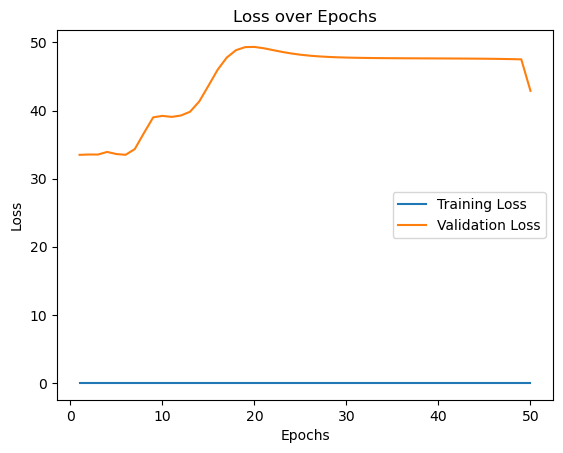

In [224]:
train_losses = []
val_losses = []

num_epochs = 50

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    for inputs, targets in dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        avg_train_loss = running_loss / len(dataset)
        train_losses.append(avg_train_loss)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(dataset)
    train_losses.append(epoch_loss)
    
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            running_val_loss += loss.item() * inputs.size(0)
    
    avg_val_loss = running_val_loss / len(dataset)
    val_losses.append(avg_val_loss)
    
    if len(train_losses) != len(val_losses):
        min_len = min(len(train_losses), len(val_losses))
        train_losses = train_losses[:min_len]
        val_losses = val_losses[:min_len]
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


import matplotlib.pyplot as plt

# Assuming you have lists of loss values for each epoch
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()



In [225]:
model.eval()  # Set the model to evaluation mode

# Example evaluation
with torch.no_grad():
    test_data = torch.linspace(-10, 10, 20).view(-1, 1)
    predictions = model(test_data)
    print(predictions)


tensor([[ 2.6274],
        [ 2.4285],
        [ 2.2296],
        [ 2.0307],
        [ 1.8317],
        [ 1.6327],
        [ 1.4427],
        [ 1.2653],
        [ 1.1463],
        [ 1.3162],
        [ 2.0391],
        [ 2.9341],
        [ 3.9486],
        [ 4.9686],
        [ 5.9861],
        [ 7.0145],
        [ 8.0458],
        [ 9.0791],
        [10.1125],
        [11.1459]])


In [226]:
# Convert predictions to a DataFrame and save to CSV
predictions_df = pd.DataFrame(predictions, columns=['Predicted'])
predictions_df.to_csv('predictions.csv', index=False)
predictions_df


,Predicted
0,2.627393
1,2.428519
2,2.229645
3,2.030712
4,1.831694
5,1.632676
6,1.442726
7,1.265318
8,1.146314
9,1.316240


In [227]:
torch.save(model.state_dict(), 'model.pth')
print("Model saved to 'model.pth'")


Model saved to 'model.pth'


In [228]:
import torch

# Set the model to evaluation mode
model.eval()

# Collect predictions and targets
all_predictions = []
all_targets = []

with torch.no_grad():  # Turn off gradients for inference
    for inputs, targets in dataloader:
        outputs = model(inputs)
        all_predictions.append(outputs)
        all_targets.append(targets)

# Concatenate all batches into single tensors
all_predictions = torch.cat(all_predictions).numpy()
all_targets = torch.cat(all_targets).numpy()


In [229]:
# Convert tensors to numpy arrays
predictions = all_predictions.squeeze()  # Remove any extra dimensions if necessary
targets = all_targets


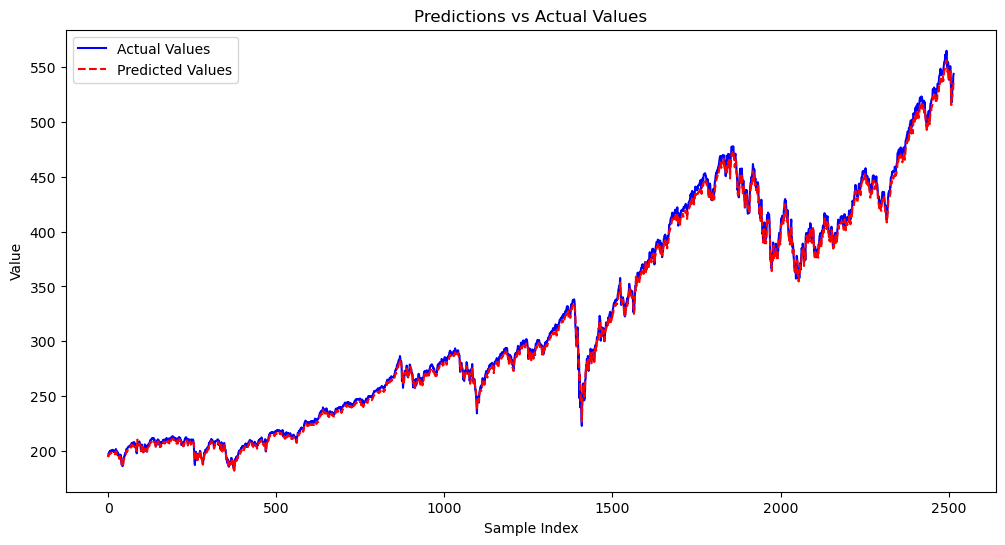

In [230]:
import matplotlib.pyplot as plt

# Plot predictions vs. targets
plt.figure(figsize=(12, 6))

# Plot actual vs. predicted values
plt.plot(targets, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Predictions vs Actual Values')
plt.legend()

# Show plot
plt.show()

In [211]:
predictions

array([203.83394, 204.61298, 205.6744 , ..., 534.024  , 540.40234,
       543.0121 ], dtype=float32)

In [212]:
targets

array([[195.72],
       [197.36],
       [198.39],
       ...,
       [533.27],
       [542.04],
       [543.75]], dtype=float32)

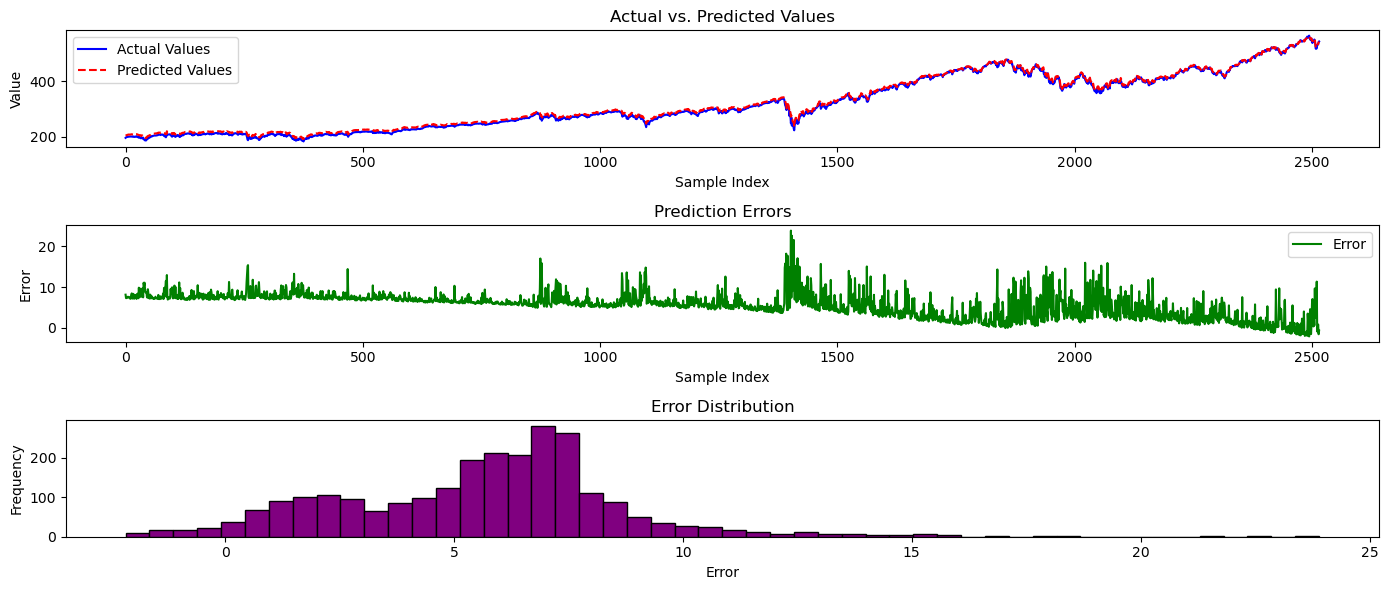

In [213]:
import matplotlib.pyplot as plt

# Ensure predictions and targets are NumPy arrays for plotting
predictions.flat = np.array(predictions).flatten()
targets.flat = np.array(targets).flatten()

# Compute the errors
errors = predictions - targets.flat

# Plot predictions, targets, and errors
plt.figure(figsize=(14, 6))

# Plot actual values vs. predicted values
plt.subplot(3, 1, 1)
plt.plot(targets.flat, label='Actual Values', color='blue')
plt.plot(predictions.flat, label='Predicted Values', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Plot errors
plt.subplot(3, 1, 2)
plt.plot(errors, label='Error', color='green')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.title('Prediction Errors')
plt.legend()

# Plot error distribution
plt.subplot(3, 1, 3)
plt.hist(errors, bins=50, color='purple', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')

plt.tight_layout()
plt.show()


In [246]:
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through LSTM
        out, _ = self.lstm(x)
        # Use the output from the last time step
        out = self.fc(out[:, -1, :])
        return out

# Example initialization with correct input size
input_size = 6  # Number of features (e.g., 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
hidden_size = 64
output_size = 1

model = LSTMModel(input_size, hidden_size, output_size)

In [254]:
seq_length = 2500

# Function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append((seq, label))
    return sequences


features = SPY[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
sequences = create_sequences(features.values, seq_length)

# Get the last sequence for prediction
current_sequence = features.iloc[-seq_length:].values
current_sequence = np.array(current_sequence, dtype=np.float32)
current_sequence = torch.tensor(current_sequence, dtype=torch.float32)
current_sequence = current_sequence.unsqueeze(0)  # Add batch dimension

print("Current Sequence:", current_sequence)



Current Sequence: tensor([[[2.0041e+02, 2.0055e+02, 1.9891e+02, 1.9932e+02, 1.6683e+02,
          8.8591e+07],
         [1.9943e+02, 2.0020e+02, 1.9877e+02, 2.0007e+02, 1.6746e+02,
          6.7251e+07],
         [1.9927e+02, 2.0033e+02, 1.9912e+02, 2.0030e+02, 1.6765e+02,
          6.6774e+07],
         ...,
         [5.3421e+02, 5.3573e+02, 5.3095e+02, 5.3327e+02, 5.3327e+02,
          4.2542e+07],
         [5.3653e+02, 5.4228e+02, 5.3628e+02, 5.4204e+02, 5.4204e+02,
          5.2333e+07],
         [5.4285e+02, 5.4496e+02, 5.4012e+02, 5.4375e+02, 5.4375e+02,
          4.2447e+07]]])


In [255]:
num_future_steps = 50
predictions = []

model.eval()
with torch.no_grad():
    for _ in range(num_future_steps):
        prediction = model(current_sequence)
        predictions.append(prediction.item())
        
        # Update the sequence for the next prediction
        new_input = torch.tensor(prediction, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
        current_sequence = torch.cat((current_sequence[:, 1:, :], new_input), dim=1)


/var/folders/hj/pwp8mnp90wb03qbkc2c60_500000gn/T/ipykernel_8587/637206222.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_input = torch.tensor(prediction, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)


RuntimeError: Tensors must have same number of dimensions: got 3 and 4

In [252]:
print(current_sequence.shape)  # Should be [batch_size, seq_length, input_size]
print(new_input.shape)         # Should be [batch_size, 1, input_size]


torch.Size([1, 2500, 6])
torch.Size([1, 1, 1, 1])
